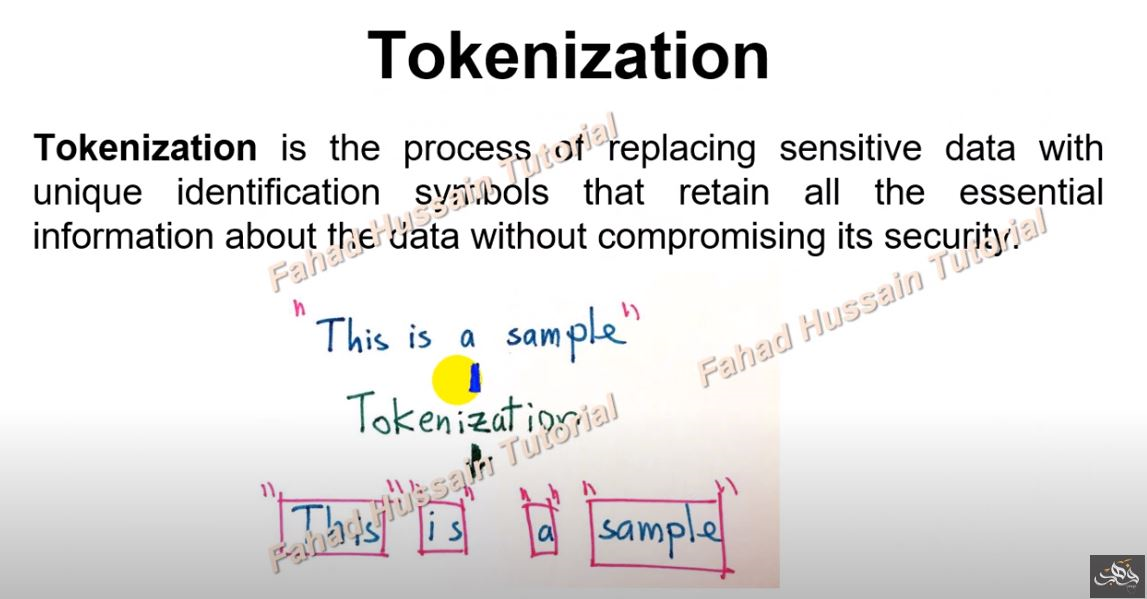

In [2]:
#Split by Whitespace
import re
text = 'I\'m with you for the entire life in U.K.!'
words = re.split(r'\W+', text)
print(words[:100])

['I', 'm', 'with', 'you', 'for', 'the', 'entire', 'life', 'in', 'U', 'K', '']


In [3]:
#Select Words
words = re.split(r'\W+', text)
print(words[:100])

['I', 'm', 'with', 'you', 'for', 'the', 'entire', 'life', 'in', 'U', 'K', '']


In [4]:
import string
import re
# split into words by white space
words = text.split()
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])



['Im', 'with', 'you', 'for', 'the', 'entire', 'life', 'in', 'UK']


In [5]:
# string.printable inverse of string.punctuation
re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
print(result)


["I'm", 'with', 'you', 'for', 'the', 'entire', 'life', 'in', 'U.K.!']


In [6]:
# Normalizing Case

# split into words by white space
words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

["i'm", 'with', 'you', 'for', 'the', 'entire', 'life', 'in', 'u.k.!']


In [ ]:
_____________________________ Working on Spacy _________________________

# Install by https://spacy.io/usage/facts-figures#benchmarks
# conda install -c conda-forge spacy
# or
# pip install -U spacy

# Alternatively you can create a virtual environment:
# conda create -n spacyenv python=3 spacy=2

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
string = '"I\'m with you for the entire life in P.K.!"'
print(string)

"I'm with you for the entire life in P.K.!"


In [10]:
doc = nlp(string)
for token in doc:
    print(token.text, end=' | ')

" | I | 'm | with | you | for | the | entire | life | in | P.K. | ! | " | 

In [11]:
doc2 = nlp(u"We're here to help! Send snail-mail, email fahad@gmail.com or visit us at https://fahadhussaincs.blogspot.com/!")
for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
fahad@gmail.com
or
visit
us
at
https://fahadhussaincs.blogspot.com/
!


In [12]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')
for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [13]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")
for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [14]:
len(doc)

13

In [15]:
len(doc.vocab)

797

In [16]:
doc5 = nlp(u'It is better to give than to receive.')
# Retrieve the third token:
doc5[2]

better

In [17]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [18]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

In [19]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [20]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

In [21]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [22]:
len(doc8.ents)

3

In [23]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [24]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [25]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


In [26]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

In [27]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc, style='dep')

C:\Users\Muhammad Iqbal\anaconda3\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

